In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm

In [477]:
T = 60
kappa = 1.
sigma = 1.
p = 0.5
batch_size = 10_000

# exchange params
Rx = 1000
Ry = 1000
phi = 0.0


In [ ]:
results = dict()

kappas = [0.2, 1., 5.]
sigmas = [0.2, 0.5, 1., 2.]
ps = [0.2, 0.5, 0.8]

for kappa in kappas:
    for sigma in sigmas:
        for p in ps:
            
            fig, ax = plt.subplots()

            # actual simulator

            zs = np.array([])

            for _ in tqdm(range(batch_size)):
                
                Rx_ = Rx
                Ry_ = Ry
                
                N = np.random.poisson(lam=T * kappa)

                for j in range(N):
                    if np.random.rand() < p:
                        mu = 0.
                        x = np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.randn())
                        y = x * (1 - phi) * Ry_ / (Rx_ + (1. - phi) * x)
                        Rx_ += x
                        Ry_ -= y
                    else:
                        mu = np.log(Ry_/Rx_)
                        y = np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.randn())
                        x = y * (1 - phi) * Rx_ / (Ry_ + (1. - phi) * y)
                        Rx_ -= x
                        Ry_ += y
                zs = np.append(zs, np.sqrt(Rx_/Ry_))

            results[(kappa, sigma, p)] = zs
                
            # approximation

            beta = kappa * (1 + sigma ** 2 - (2*p-1)**2) * (2-phi)**2 / 8 / Rx / Ry
            nu = 4 * (2*p - 1) * np.sqrt(Rx*Ry) / (1 + sigma ** 2 - (2*p-1)**2) / (2-phi)
            xi = np.sqrt(kappa * (1 + sigma ** 2 - (2*p-1)**2)) * (2-phi) / 2 / np.sqrt(Rx*Ry)
            
            print(beta, nu, xi)

            mean = np.sqrt(Rx/Ry) + beta*nu*T
            var = xi**2*T
            
            print(mean, var)

            # Plot the KDE plot for the dataset

            data = (zs - mean) / np.sqrt(var)
            sns.kdeplot(data, label='Data')

            # Plot the standard normal density line for comparison
            x = np.linspace(np.min(data), np.max(data), 1001)
            y = norm.pdf(x, 0, 1)
            ax.plot(x, y, label='Standard Normal', color='red', linestyle='--')
            ax.set_title(f"kappa={kappa}, sigma={sigma}, p={p}")

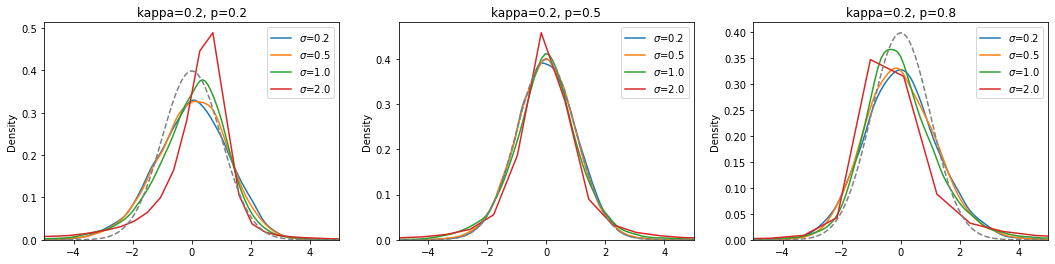

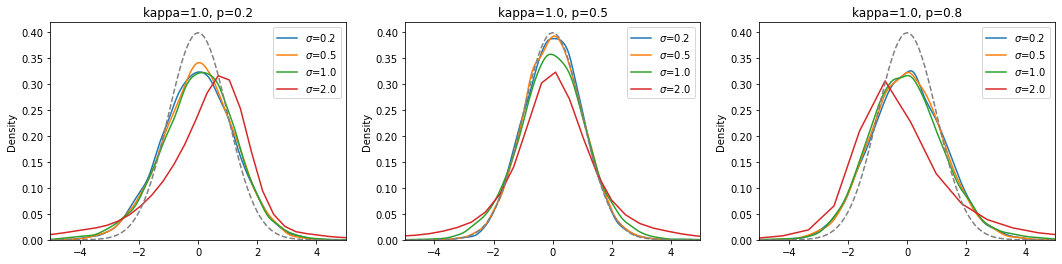

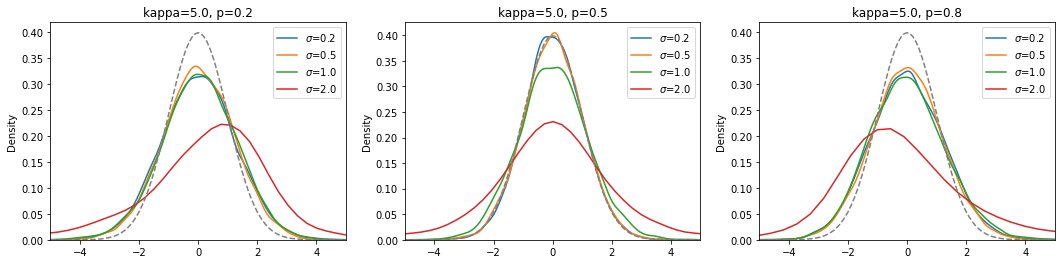

In [479]:
lim = 5.
T = 60

for kappa in [0.2, 1., 5.]:
    
    fig, ax = plt.subplots(ncols=3, figsize=(18,4))
    
    for i, p in enumerate([0.2, 0.5, 0.8]):
    
        ax[i].set_xlim((-lim, lim))
                
        for sigma in [0.2, 0.5, 1., 2.]:
            
            beta = kappa * (1 + sigma ** 2 - (2*p-1)**2) * (2-phi)**2 / 8 / Rx / Ry
            nu = 4 * (2*p - 1) * np.sqrt(Rx*Ry) / (1 + sigma ** 2 - (2*p-1)**2) / (2-phi)
            xi = np.sqrt(kappa * (1 + sigma ** 2 - (2*p-1)**2)) * (2-phi) / 2 / np.sqrt(Rx*Ry)

            mean = np.sqrt(Rx/Ry) + beta*nu*T
            var = xi**2*T

            rs = (results[(kappa, sigma, p)] - mean) / np.sqrt(var)
            sns.kdeplot(rs, ax=ax[i], label=f"$\sigma$={sigma}")

        xs = np.linspace(-lim, lim, 101)
        ys = norm.pdf(xs)
        
        ax[i].set_title(f"kappa={kappa}, p={p}")
        ax[i].plot(xs, ys, linestyle='--', c='grey')
        ax[i].legend()